In [11]:
import pandas as pd
import numpy as np
from numpy import array
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import preprocessing
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.preprocessing import StandardScaler, MinMaxScaler

import tensorflow as tf
from tensorflow import keras

from keras.models import Sequential
from keras.layers import LSTM, Dense
from keras import optimizers

In [12]:
df = pd.read_csv(
    "PRSA_Data_20130301-20170228/PRSA_Data_Aotizhongxin_20130301-20170228.csv")

In [14]:
df

No  year  month  day  hour  PM2.5  PM10   SO2   NO2     CO    O3  \
0          1  2013      3    1     0    4.0   4.0   4.0   7.0  300.0  77.0   
1          2  2013      3    1     1    8.0   8.0   4.0   7.0  300.0  77.0   
2          3  2013      3    1     2    7.0   7.0   5.0  10.0  300.0  73.0   
3          4  2013      3    1     3    6.0   6.0  11.0  11.0  300.0  72.0   
4          5  2013      3    1     4    3.0   3.0  12.0  12.0  300.0  72.0   
...      ...   ...    ...  ...   ...    ...   ...   ...   ...    ...   ...   
35059  35060  2017      2   28    19   12.0  29.0   5.0  35.0  400.0  95.0   
35060  35061  2017      2   28    20   13.0  37.0   7.0  45.0  500.0  81.0   
35061  35062  2017      2   28    21   16.0  37.0  10.0  66.0  700.0  58.0   
35062  35063  2017      2   28    22   21.0  44.0  12.0  87.0  700.0  35.0   
35063  35064  2017      2   28    23   19.0  31.0  10.0  79.0  600.0  42.0   

       TEMP    PRES  DEWP  RAIN   wd  WSPM       station  
0      -0.7  1023.0 -18.8   0.0  NNW   4.4  Aotizhongxin  
1      -1.1  1023.2 -18.2   0.0    N   4.7  Aotizhongxin  
2      -1.1  1023.5 -18.2   0.0  NNW   5.6  Aotizhongxin  
3      -1.4  1024.5 -19.4   0.0   NW   3.1  Aotizhongxin  
4      -2.0  1025.2 -19.5   0.0    N   2.0  Aotizhongxin  
...     ...     ...   ...   ...  ...   ...           ...  
35059  12.5  1013.5 -16.2   0.0   NW   2.4  Aotizhongxin  
35060  11.6  1013.6 -15.1   0.0  WNW   0.9  Aotizhongxin  
35061  10.8  1014.2 -13.3   0.0   NW   1.1  Aotizhongxin  
35062  10.5  1014.4 -12.9   0.0  NNW   1.2  Aotizhongxin  
35063   8.6  1014.1 -15.9   0.0  NNE   1.3  Aotizhongxin  

[35064 rows x 18 columns]

#### Detail Infos about df

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34139 non-null  float64
 6   PM10     34346 non-null  float64
 7   SO2      34129 non-null  float64
 8   NO2      34041 non-null  float64
 9   CO       33288 non-null  float64
 10  O3       33345 non-null  float64
 11  TEMP     35044 non-null  float64
 12  PRES     35044 non-null  float64
 13  DEWP     35044 non-null  float64
 14  RAIN     35044 non-null  float64
 15  wd       34983 non-null  object 
 16  WSPM     35050 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


In [16]:
df.describe()

No          year         month           day          hour  \
count  35064.000000  35064.000000  35064.000000  35064.000000  35064.000000   
mean   17532.500000   2014.662560      6.522930     15.729637     11.500000   
std    10122.249256      1.177213      3.448752      8.800218      6.922285   
min        1.000000   2013.000000      1.000000      1.000000      0.000000   
25%     8766.750000   2014.000000      4.000000      8.000000      5.750000   
50%    17532.500000   2015.000000      7.000000     16.000000     11.500000   
75%    26298.250000   2016.000000     10.000000     23.000000     17.250000   
max    35064.000000   2017.000000     12.000000     31.000000     23.000000   

              PM2.5          PM10           SO2           NO2            CO  \
count  34139.000000  34346.000000  34129.000000  34041.000000  33288.000000   
mean      82.773611    110.060391     17.375901     59.305833   1262.945145   
std       82.135694     95.223005     22.823017     37.116200   1221.436236   
min        3.000000      2.000000      0.285600      2.000000    100.000000   
25%       22.000000     38.000000      3.000000     30.000000    500.000000   
50%       58.000000     87.000000      9.000000     53.000000    900.000000   
75%      114.000000    155.000000     21.000000     82.000000   1500.000000   
max      898.000000    984.000000    341.000000    290.000000  10000.000000   

                 O3          TEMP          PRES          DEWP          RAIN  \
count  33345.000000  35044.000000  35044.000000  35044.000000  35044.000000   
mean      56.353358     13.584607   1011.846920      3.123062      0.067421   
std       57.916327     11.399097     10.404047     13.688896      0.910056   
min        0.214200    -16.800000    985.900000    -35.300000      0.000000   
25%        8.000000      3.100000   1003.300000     -8.100000      0.000000   
50%       42.000000     14.500000   1011.400000      3.800000      0.000000   
75%       82.000000     23.300000   1020.100000     15.600000      0.000000   
max      423.000000     40.500000   1042.000000     28.500000     72.500000   

               WSPM  
count  35050.000000  
mean       1.708496  
std        1.204071  
min        0.000000  
25%        0.900000  
50%        1.400000  
75%        2.200000  
max       11.200000

In [17]:
df.isnull().sum()

No            0
year          0
month         0
day           0
hour          0
PM2.5       925
PM10        718
SO2         935
NO2        1023
CO         1776
O3         1719
TEMP         20
PRES         20
DEWP         20
RAIN         20
wd           81
WSPM         14
station       0
dtype: int64

In [20]:
df = df.dropna()

In [21]:
df.isnull().sum()

No         0
year       0
month      0
day        0
hour       0
PM2.5      0
PM10       0
SO2        0
NO2        0
CO         0
O3         0
TEMP       0
PRES       0
DEWP       0
RAIN       0
wd         0
WSPM       0
station    0
dtype: int64

In [23]:
df.shape

(31815, 18)

In [24]:
df.head()

No  year  month  day  hour  PM2.5  PM10   SO2   NO2     CO    O3  TEMP  \
0   1  2013      3    1     0    4.0   4.0   4.0   7.0  300.0  77.0  -0.7   
1   2  2013      3    1     1    8.0   8.0   4.0   7.0  300.0  77.0  -1.1   
2   3  2013      3    1     2    7.0   7.0   5.0  10.0  300.0  73.0  -1.1   
3   4  2013      3    1     3    6.0   6.0  11.0  11.0  300.0  72.0  -1.4   
4   5  2013      3    1     4    3.0   3.0  12.0  12.0  300.0  72.0  -2.0   

     PRES  DEWP  RAIN   wd  WSPM       station  
0  1023.0 -18.8   0.0  NNW   4.4  Aotizhongxin  
1  1023.2 -18.2   0.0    N   4.7  Aotizhongxin  
2  1023.5 -18.2   0.0  NNW   5.6  Aotizhongxin  
3  1024.5 -19.4   0.0   NW   3.1  Aotizhongxin  
4  1025.2 -19.5   0.0    N   2.0  Aotizhongxin

#### split into train and test


In [38]:
train_size = int(df.shape[0]*0.8)
test_size = df.shape[0] - train_size
train_size, test_size

(25452, 6363)

- There are many pollutants(çevre kirliliğine yol açan madde). Let's first try to predict PM2.5 concentration values.
- Let the years 2016 and 2017 be the testing set.
- As you can see below, these 2 years account for 28.31% of the data (test set).

In [39]:
df.loc[train_size:].count() / df.shape[0] * 100

No         28.310545
year       28.310545
month      28.310545
day        28.310545
hour       28.310545
PM2.5      28.310545
PM10       28.310545
SO2        28.310545
NO2        28.310545
CO         28.310545
O3         28.310545
TEMP       28.310545
PRES       28.310545
DEWP       28.310545
RAIN       28.310545
wd         28.310545
WSPM       28.310545
station    28.310545
dtype: float64

In [40]:
X_train = df[:train_size]
X_test = df[train_size:]

y_train = X_train["PM2.5"]
y_test = X_test["PM2.5"]

In [41]:
X_train

No  year  month  day  hour  PM2.5  PM10   SO2   NO2     CO     O3  \
0          1  2013      3    1     0    4.0   4.0   4.0   7.0  300.0   77.0   
1          2  2013      3    1     1    8.0   8.0   4.0   7.0  300.0   77.0   
2          3  2013      3    1     2    7.0   7.0   5.0  10.0  300.0   73.0   
3          4  2013      3    1     3    6.0   6.0  11.0  11.0  300.0   72.0   
4          5  2013      3    1     4    3.0   3.0  12.0  12.0  300.0   72.0   
...      ...   ...    ...  ...   ...    ...   ...   ...   ...    ...    ...   
28277  28278  2016      5   22     5   62.0  86.0   9.0  92.0  800.0    2.0   
28278  28279  2016      5   22     6   56.0  71.0   8.0  86.0  700.0    6.0   
28279  28280  2016      5   22     7   54.0  73.0   9.0  85.0  700.0    8.0   
28280  28281  2016      5   22     8   46.0  61.0   9.0  61.0  700.0   52.0   
28281  28282  2016      5   22     9   54.0  66.0   9.0  35.0  600.0  101.0   

       TEMP    PRES  DEWP  RAIN   wd  WSPM       station  
0      -0.7  1023.0 -18.8   0.0  NNW   4.4  Aotizhongxin  
1      -1.1  1023.2 -18.2   0.0    N   4.7  Aotizhongxin  
2      -1.1  1023.5 -18.2   0.0  NNW   5.6  Aotizhongxin  
3      -1.4  1024.5 -19.4   0.0   NW   3.1  Aotizhongxin  
4      -2.0  1025.2 -19.5   0.0    N   2.0  Aotizhongxin  
...     ...     ...   ...   ...  ...   ...           ...  
28277  17.2  1015.5   8.9   0.0   NE   0.9  Aotizhongxin  
28278  18.2  1015.5   8.5   0.0  ENE   1.1  Aotizhongxin  
28279  19.3  1015.6   7.7   0.0  ENE   1.1  Aotizhongxin  
28280  21.4  1015.8   7.6   0.0    N   1.9  Aotizhongxin  
28281  23.5  1015.2   8.7   0.0   NE   1.8  Aotizhongxin  

[25452 rows x 18 columns]

In [42]:
y_train

0         4.0
1         8.0
2         7.0
3         6.0
4         3.0
         ... 
28277    62.0
28278    56.0
28279    54.0
28280    46.0
28281    54.0
Name: PM2.5, Length: 25452, dtype: float64

In [43]:
X_test

No  year  month  day  hour  PM2.5  PM10   SO2   NO2     CO     O3  \
28282  28283  2016      5   22    10   37.0  83.0   7.0  21.0  600.0  126.0   
28283  28284  2016      5   22    11   37.0  78.0   7.0  20.0  600.0  146.0   
28284  28285  2016      5   22    12   38.0  71.0   7.0  23.0  600.0  164.0   
28285  28286  2016      5   22    13   49.0  69.0   7.0  20.0  500.0  200.0   
28286  28287  2016      5   22    14   41.0  57.0   8.0  14.0  500.0  223.0   
...      ...   ...    ...  ...   ...    ...   ...   ...   ...    ...    ...   
35059  35060  2017      2   28    19   12.0  29.0   5.0  35.0  400.0   95.0   
35060  35061  2017      2   28    20   13.0  37.0   7.0  45.0  500.0   81.0   
35061  35062  2017      2   28    21   16.0  37.0  10.0  66.0  700.0   58.0   
35062  35063  2017      2   28    22   21.0  44.0  12.0  87.0  700.0   35.0   
35063  35064  2017      2   28    23   19.0  31.0  10.0  79.0  600.0   42.0   

       TEMP    PRES  DEWP  RAIN   wd  WSPM       station  
28282  25.5  1015.2   8.0   0.0    N   1.9  Aotizhongxin  
28283  27.0  1014.4   7.9   0.0  NNE   1.4  Aotizhongxin  
28284  27.7  1013.6   8.0   0.0    S   1.2  Aotizhongxin  
28285  28.7  1012.8   4.9   0.0   SE   2.1  Aotizhongxin  
28286  29.1  1011.6   5.8   0.0    S   2.1  Aotizhongxin  
...     ...     ...   ...   ...  ...   ...           ...  
35059  12.5  1013.5 -16.2   0.0   NW   2.4  Aotizhongxin  
35060  11.6  1013.6 -15.1   0.0  WNW   0.9  Aotizhongxin  
35061  10.8  1014.2 -13.3   0.0   NW   1.1  Aotizhongxin  
35062  10.5  1014.4 -12.9   0.0  NNW   1.2  Aotizhongxin  
35063   8.6  1014.1 -15.9   0.0  NNE   1.3  Aotizhongxin  

[6363 rows x 18 columns]

In [44]:
y_test

28282    37.0
28283    37.0
28284    38.0
28285    49.0
28286    41.0
         ... 
35059    12.0
35060    13.0
35061    16.0
35062    21.0
35063    19.0
Name: PM2.5, Length: 6363, dtype: float64

#### Normalize the data


In [54]:
train_norm = X_train["PM2.5"]
train_norm_arr = np.asarray(train_norm)
train_norm = np.reshape(train_norm_arr, (-1, 1))

scaler = MinMaxScaler(feature_range=(0, 1))
train_norm = scaler.fit_transform(train_norm)

- Even after normalization and scaling, note that null values are possible !!!

Let's check if any null values are present.

In [55]:
count = 0

for i in range(len(train_norm)):
    if train_norm[i] == 0:
        count += 1

print("Number of null values in train_norm = ", count)

Number of null values in train_norm =  301


In [56]:
train_norm = train_norm[train_norm != 0]
train_norm

array([0.00140845, 0.00704225, 0.0056338 , ..., 0.07183099, 0.06056338,
       0.07183099])

In [57]:
test_norm = X_test["PM2.5"]
test_norm_arr = np.asarray(test_norm)
test_norm = np.reshape(test_norm_arr, (-1, 1))
scaler = MinMaxScaler(feature_range=(0, 1))
test_norm = scaler.fit_transform(test_norm)

In [58]:
count = 0

for i in range(len(test_norm)):
    if test_norm[i] == 0:
        count += 1

print("Number of null values in test_norm = ", count)

Number of null values in test_norm =  124


In [59]:
test_norm = test_norm[test_norm != 0]

#### Split data using timestamp


- Our data is a time series data and we want to predict the values after looking at a set of values rather than just a single value.
- This takes into account the correlation between the data points and the timestamps.
- Because the neighbors should be considered for how the values change over time.

Let's define a function to do this.

The below function called split_sequence splits the sequence into sets of n values. This n is given as n_steps(step size).

For example, if n=3, we split the sequence in groups of 3. We create 2 empty lists and append the split sequences.


In [62]:
def split_sequence(sequence, n_steps):
    X, y = list(), list()

    for i in range(len(sequence)):
        # find the end of this pattern
        end_ix = i + n_steps
        # check if we are beyond the sequence

        if end_ix > len(sequence)-1:
            break
        # gather input and output parts of the pattern
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
        X.append(seq_x)
        y.append(seq_y)

    return array(X), array(y)

In [63]:
n_steps = 3
n_features = 1

In [64]:
# Train split
X_split_train, y_split_train = split_sequence(train_norm, n_steps)

# Test split
X_split_test, y_split_test = split_sequence(test_norm, n_steps)

In [68]:
X_split_train = X_split_train.reshape(
    (X_split_train.shape[0], X_split_train.shape[1], n_features))

X_split_test = X_split_test.reshape(
    (X_split_test.shape[0], X_split_test.shape[1], n_features))

X_split_train

array([[[0.00140845],
        [0.00704225],
        [0.0056338 ]],

       [[0.00704225],
        [0.0056338 ],
        [0.00422535]],

       [[0.0056338 ],
        [0.00422535],
        [0.0028169 ]],

       ...,

       [[0.08873239],
        [0.08309859],
        [0.07464789]],

       [[0.08309859],
        [0.07464789],
        [0.07183099]],

       [[0.07464789],
        [0.07183099],
        [0.06056338]]])

In [70]:
for i in range(5):
    print(X_split_test[i], "---->", y_split_test[i])

[[0.04788732]
 [0.04788732]
 [0.04929577]] ----> 0.06478873239436621
[[0.04788732]
 [0.04929577]
 [0.06478873]] ----> 0.053521126760563385
[[0.04929577]
 [0.06478873]
 [0.05352113]] ----> 0.060563380281690136
[[0.06478873]
 [0.05352113]
 [0.06056338]] ----> 0.06338028169014086
[[0.05352113]
 [0.06056338]
 [0.06338028]] ----> 0.059154929577464786


- For this output above, we predict 0.0647 as an output using 3 values ([[0.04788732]  [0.04788732]  [0.04929577]])
- After the first step we use 0.0647 value as input to predict next value. This is a critical point when dealing with time series data.

#### Create a LSTM Model

- Let's define a LSTM(Long-Short Term Memory). It is a Neural Network.
- Firstly add 50 nodes into our first layer with a ReLU(Rectifier Linear Unit). ReLU is a activation function.
- Their shape will be step size, number of features.
- For the output we will add a dense layer with one node.
-
- We can try out different optimizers to see which minimizes loss and maximizes accuracy.
- Stochastic Gradient Descent(SGD), Adam, AdaBoost, RMSProp are few of them.
  - lr=learning rate,
  - decay=by how much to decay learning rate,
  - momentum=how much should the gradient descent be accelerated to dampen oscillations(salınımları azaltmak),
  - nesterov=whether to use nesterov momentum. Nesterov has stronger convergence(yakınsama) for convex functions.
- We compile using MSE(Mean Squared Error) as our loss function.

In [73]:
model = Sequential()
model.add(LSTM(50, activation="relu", input_shape=(n_steps, n_features)))
model.add(Dense(1))

sgd = optimizers.SGD(learning_rate=0.01, weight_decay=1e-5,
                     momentum=0.9, nesterov=True)

keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9,
                      beta_2=0.999, amsgrad=False)

model.compile(optimizer='sgd', loss='mse', metrics=["accuracy"])

##### Fit the model

In [74]:
hist = model.fit(X_split_train, y_split_train, validation_data=(
    X_split_test, y_split_test), epochs=13, verbose=1)

Epoch 1/13
786/786 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.0000e+00 - loss: 0.0110 - val_accuracy: 0.0000e+00 - val_loss: 0.0114
Epoch 2/13
786/786 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.0000e+00 - loss: 0.0090 - val_accuracy: 0.0000e+00 - val_loss: 0.0101
Epoch 3/13
786/786 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.0000e+00 - loss: 0.0082 - val_accuracy: 0.0000e+00 - val_loss: 0.0091
Epoch 4/13
786/786 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.0000e+00 - loss: 0.0073 - val_accuracy: 0.0000e+00 - val_loss: 0.0081
Epoch 5/13
786/786 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.0000e+00 - loss: 0.0065 - val_accuracy: 0.0000e+00 - val_loss: 0.0072
Epoch 6/13
786/786 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.0000e+00 - loss: 0.0058 - val_accuracy: 0.0000e+00 - val_loss: 0.0063
Epoch 7/13
786/786 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.0000e+00 - loss: 0.0050 - val_accuracy: 0.0000e+00 - val_loss: 0.0054
Epoch 8/13
786/786 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/s

In [75]:
hist.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

In [79]:
y_pred = model.predict(X_split_test)

195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 546us/step


In [80]:
for i in range(5):
    print(y_pred[i])

[0.0654298]
[0.07066701]
[0.0711327]
[0.07352231]
[0.07401247]


In [37]:
mse_result = mean_squared_error(y_split_test, y_pred)
print("MSE: %.5f" % mse_result)

MSE: 0.00183


#### Save the Model

In [99]:
# model.save("quality_prediction_model.h5")
# WARNING:absl:You are saving your model as an HDF5 file via `model.save()` or `keras.saving.save_model(model)`. This file format is considered legacy.
# We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')` or `keras.saving.save_model(model, 'my_model.keras')`. 

In [100]:
model.save("quality_prediction_model.keras")

#### Plot Results

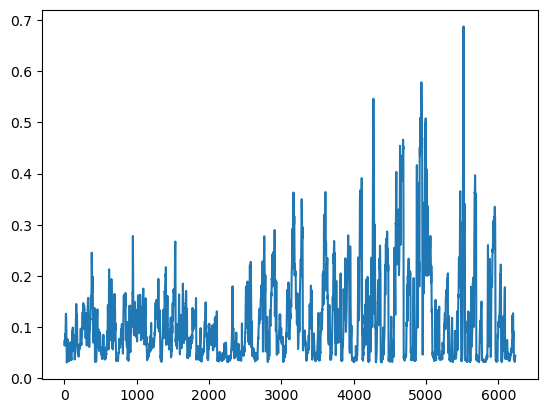

In [81]:
plt.plot(y_pred)

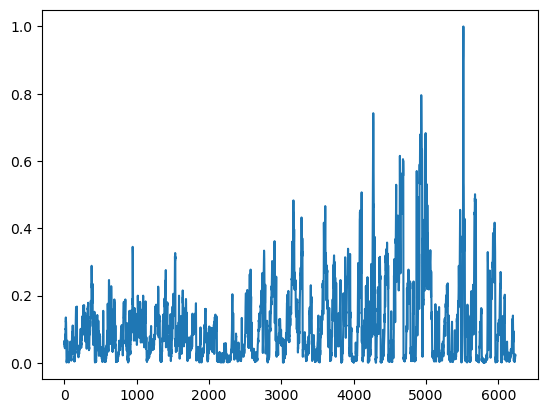

In [82]:
plt.plot(y_split_test)

In [83]:
_, train_acc = model.evaluate(X_split_train, y_split_train, verbose=0)
_, test_acc = model.evaluate(X_split_test, y_split_test, verbose=0)
print('Train: %.6f, Test: %.5f' % (train_acc, test_acc))

Train: 0.000000, Test: 0.00016


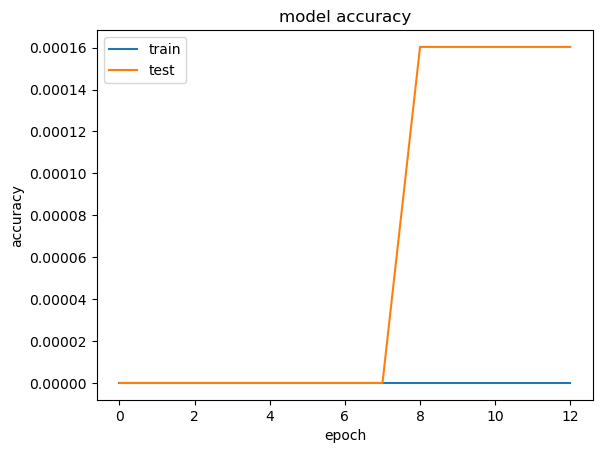

In [84]:
# summarize history for accuracy
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

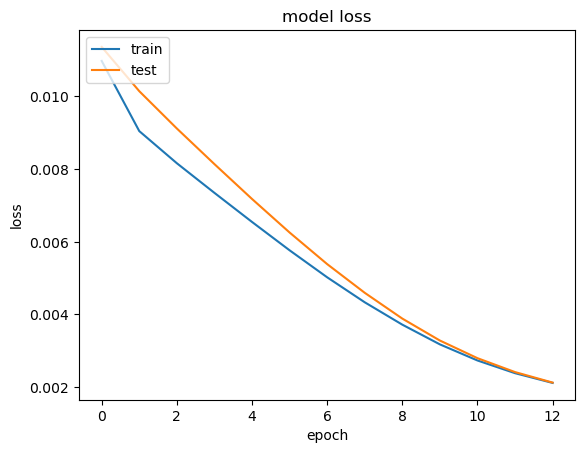

In [85]:
# summarize history for loss
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

- Until now, we just ran our model for prediction of a single pollutant.
- We have 6 pollutants in our dataset and can make predictions for all of them.
- So, I have made a function which can be used to predict the other pollutants rather than having to write the code again and again.


#### Plot columns

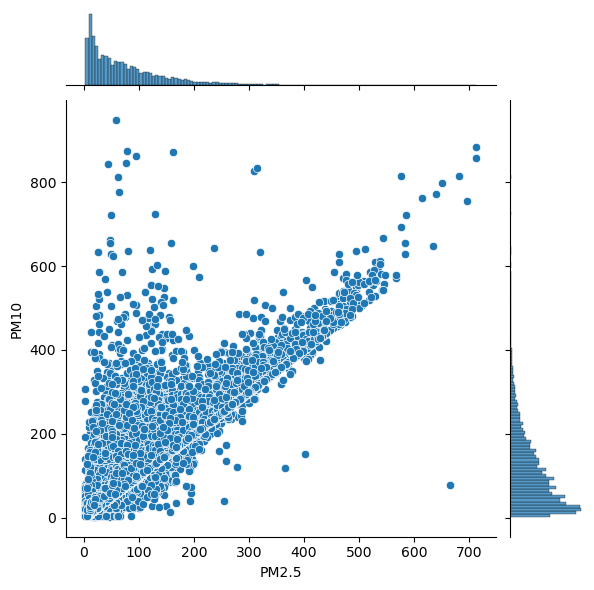

In [86]:
sns.jointplot(x=df['PM2.5'], y=df['PM10'], data = df)

In [87]:
# # finding correlation
# corrmat = df.corr()
# fig, ax = plt.subplots(figsize=(11, 11))

# # Heatmap
# sns.heatmap(corrmat)

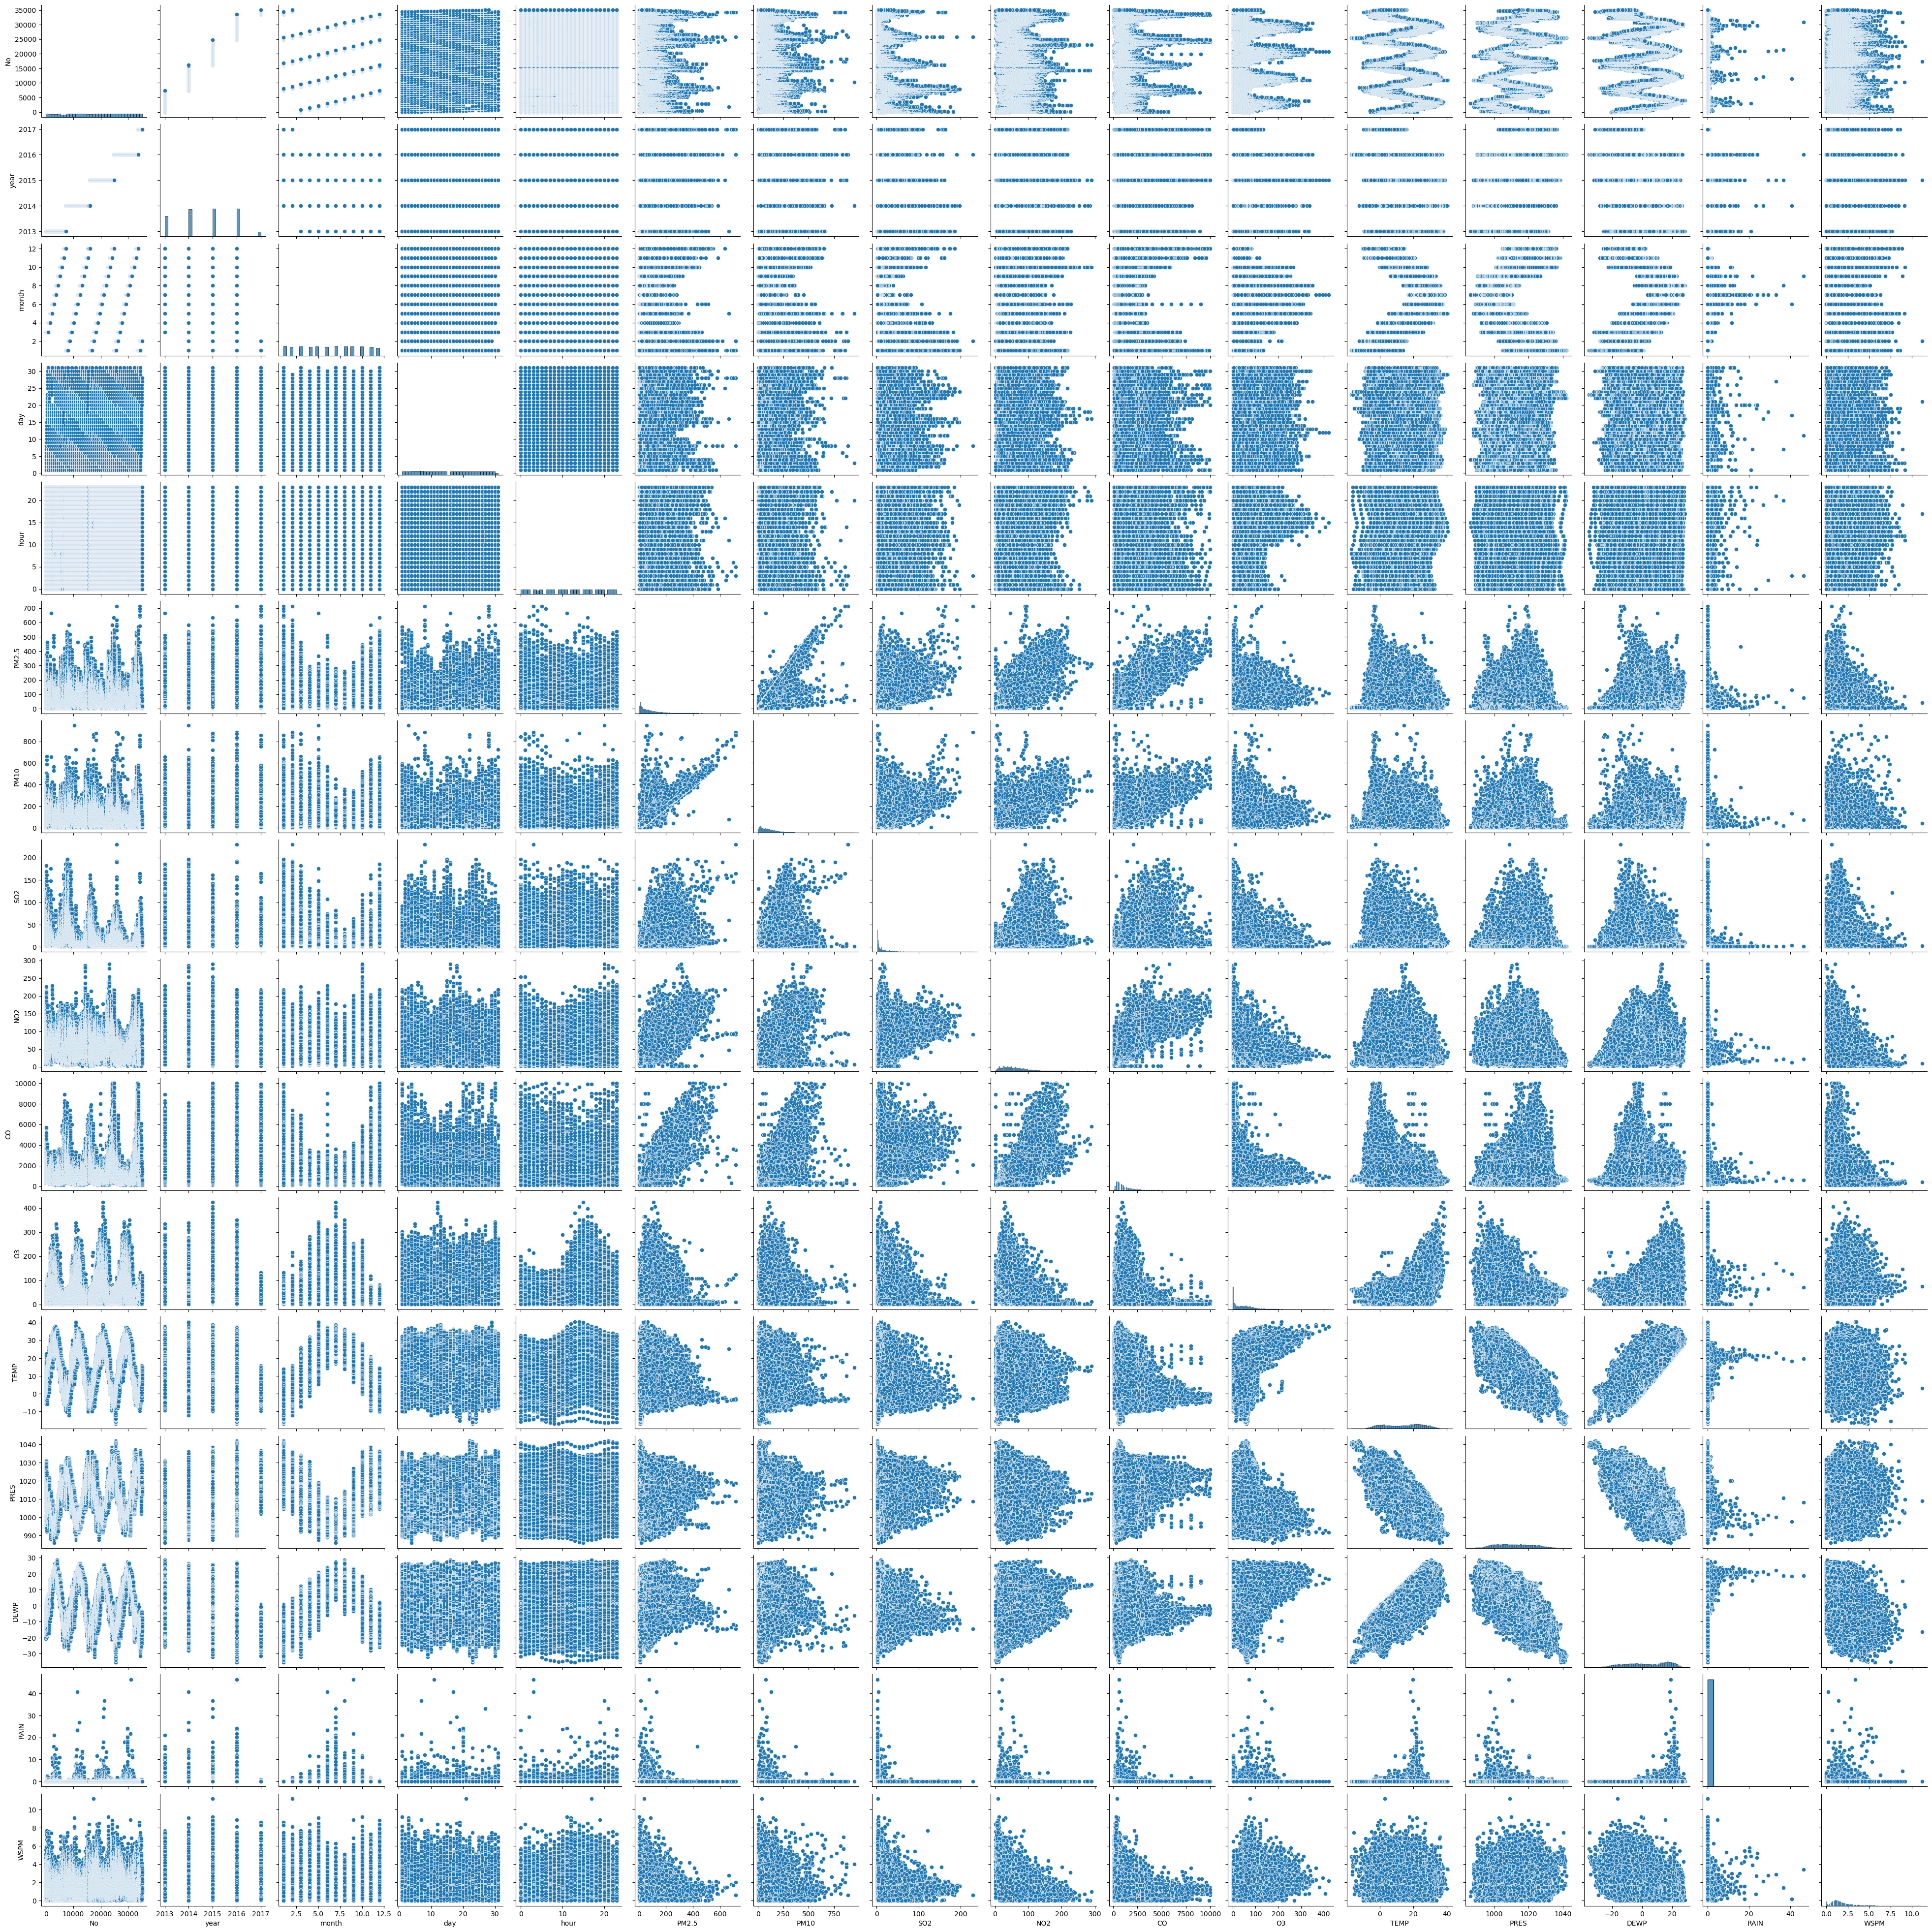

In [88]:
g = sns.pairplot(df)

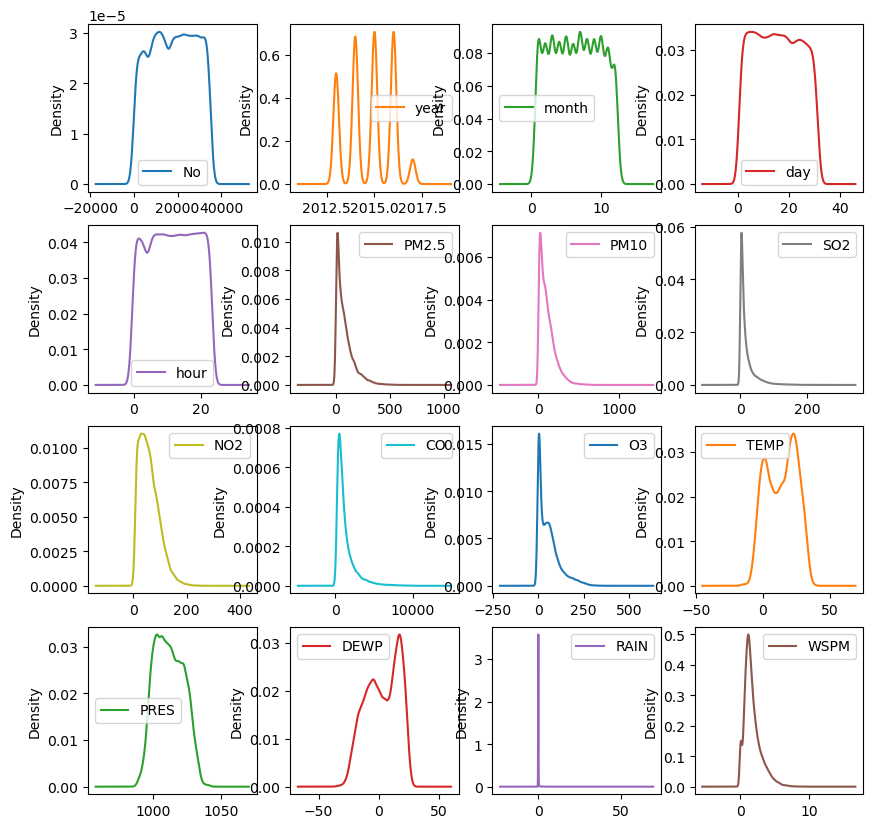

In [89]:
#density plots
df.plot(kind='density', subplots=True, layout=(4,4), sharex=False, figsize=(10,10))
plt.show()

<Axes: xlabel='PM2.5', ylabel='PM10'>

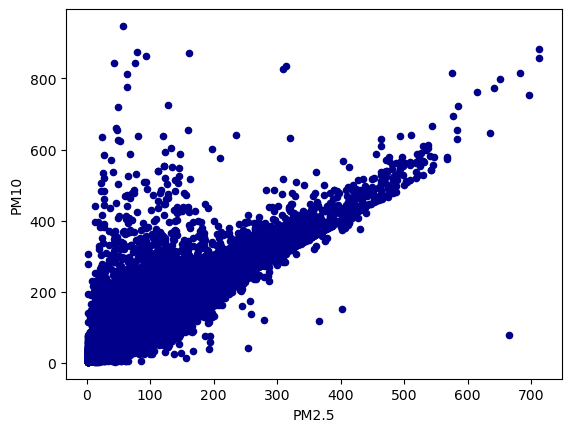

In [90]:
#scatter plots
df.plot.scatter(x='PM2.5', y='PM10', c='DarkBlue')

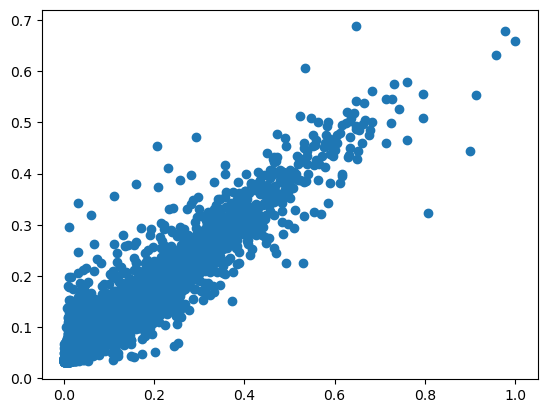

In [91]:
plt.scatter(y_split_test, y_pred)

<Axes: xlabel='PM10', ylabel='SO2'>

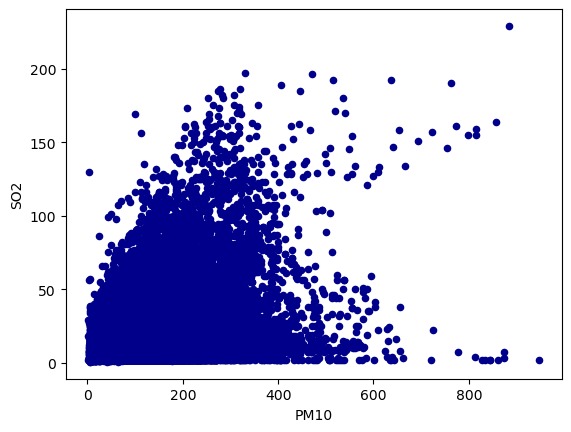

In [92]:
df.plot.scatter(x='PM10', y='SO2', c='DarkBlue')

<Axes: xlabel='SO2', ylabel='NO2'>

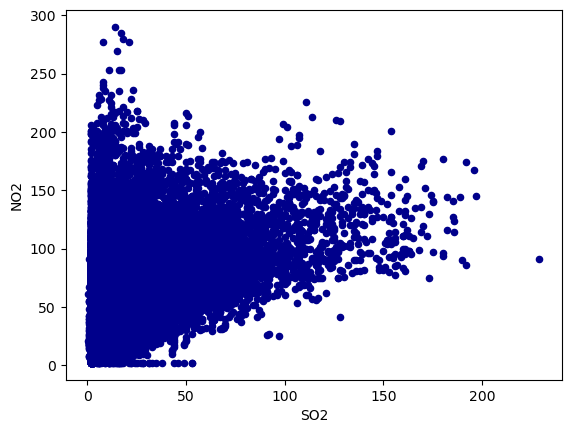

In [93]:
df.plot.scatter(x='SO2', y='NO2', c='DarkBlue')

<Axes: xlabel='NO2', ylabel='CO'>

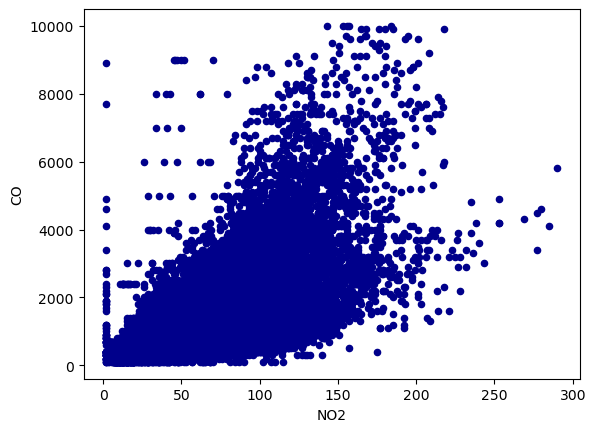

In [94]:
df.plot.scatter(x='NO2', y='CO', c='DarkBlue')

<Axes: xlabel='CO', ylabel='O3'>

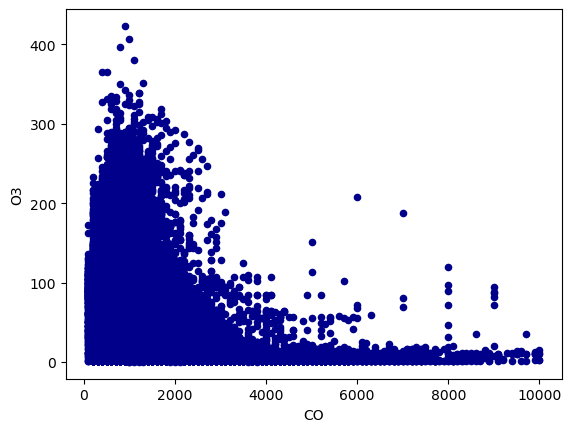

In [95]:
df.plot.scatter(x='CO', y='O3', c='DarkBlue')

In [ ]:
correlations = df.corr()
fig, ax = plt.subplots(figsize=(15, 15))
sns.heatmap(correlations, vmax=1.0, center=0, fmt='.2f', square=True,
            linewidths=.5, annot=True, cbar_kws={"shrink": .70})
plt.show()

In [ ]:
def compute(var):
    train_norm = X_train[var]
    train_norm_arr = np.asarray(train_norm)
    train_norm = np.reshape(train_norm_arr, (-1, 1))
    scaler = MinMaxScaler(feature_range=(0, 1))
    train_norm = scaler.fit_transform(train_norm)

    test_norm = X_test[var]
    test_norm_arr = np.asarray(test_norm)
    test_norm = np.reshape(test_norm_arr, (-1, 1))
    scaler = MinMaxScaler(feature_range=(0, 1))
    test_norm = scaler.fit_transform(test_norm)

    X_split_train, y_split_train = split_sequence(train_norm, n_steps)
    X_split_train = X_split_train.reshape(
        (X_split_train.shape[0], X_split_train.shape[1], n_features))

    X_split_test, y_split_test = split_sequence(test_norm, n_steps)
    X_split_test = X_split_test.reshape(
        (X_split_test.shape[0], X_split_test.shape[1], n_features))

    hist = model.fit(X_split_train, y_split_train, validation_data=(
        X_split_test, y_split_test), epochs=10, verbose=1)

    yhat = model.predict(X_split_test)

    mse = mean_squared_error(y_split_test, yhat)
    print(mse)

    plt.plot(hist.history['accuracy'])
    plt.plot(hist.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

    plt.plot(hist.history['loss'])
    plt.plot(hist.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

# compute('PM2.5')
# compute('PM10')
# compute('SO2')
# compute('NO2')
# compute('CO')
# compute('O3')